# **Import Libraries and modules**

In [1]:
# install keras library and import keras module

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# here, we are importing numpy module with short name 'np' and importing sequential type model,
# Flatten and convolution2D layers, util and mnist dataset


import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


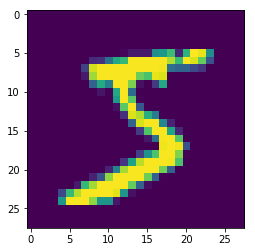

In [4]:
# print shape of training data
print (X_train.shape)

# import pyplot module and print 0th training example from training dataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# Preprocess input data for Keras

In [0]:
# reshape trining and test dataset 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# convert train and test data into float and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Preprocess class labels for Keras¶

In [0]:
# look at labels of first 10 training example
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Define model architecture

In [0]:
# Import Activation 
from keras.layers import Activation

# Declare sequential model
model = Sequential()

# declare input layer, input shape parameter should be 1 sample and should be in the form of (depth, width, height) for image 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24                        receptive field= 3X3
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22                        receptive field= 5X5
model.add(BatchNormalization())
model.add(Dropout(0.1))
          
# add maxpooling layer of size 2
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
          
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11                        receptive field= 7X7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu')) # 9                         receptive field= 9X9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7                         receptive field= 11X11
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7                             receptive field= 13X13
model.add(BatchNormalization())

# final layer has an output size of 10
model.add(Convolution2D(10, 7)) 

# add flatten layer
model.add(Flatten())

# add softmax activation function 
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23:

In [0]:
#summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_470 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_336 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_471 (Conv2D)          (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_337 (Bat (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_472 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_338 (Bat (None, 22, 22, 20)        80        
_________________________________________________________________
dropout_139 (Dropout)        (None, 22, 22, 20)        0         
__________

# Compile model

In [0]:
# compile the model, while compiling the model declare loss function and optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Fit model on training data

In [0]:
# To train the model, pass training data, declare batch size and number of epochs
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Epoch 1/10
  896/60000 [..............................] - ETA: 9s - loss: 0.0019 - acc: 0.9989     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 134us/step - loss: 0.0054 - acc: 0.9982
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0052 - acc: 0.9981
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0048 - acc: 0.9985
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0047 - acc: 0.9984
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0044 - acc: 0.9986
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0046 - acc: 0.9983
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0053 - acc: 0.9983
Epoch 8/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0053 - acc: 0.9984
Epoch 9/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0051 - acc: 0.9982
Epoch 10/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0055 - acc: 0.9983


# Evaluate model on test data

In [0]:
# Pass test data to evaluate model performance
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# Print the score 
print(score)

[0.02948788119725559, 0.994]


In [0]:
# predict labels of test data
y_pred = model.predict(X_test)

In [0]:
# print 1st ten prediction 
print(y_pred[:9])
print(y_test[:9])

[[7.74288451e-18 3.64165268e-13 2.45784729e-12 2.56256127e-12
  1.73554086e-15 6.35007234e-20 1.33081769e-22 1.00000000e+00
  2.09771039e-19 5.45386965e-11]
 [2.10638093e-13 1.13721654e-08 1.00000000e+00 1.22814483e-16
  4.59180372e-15 4.77563712e-20 6.12717732e-12 7.66562859e-16
  2.33078971e-14 4.59739202e-16]
 [1.92819583e-13 1.00000000e+00 1.98286401e-10 2.78901685e-13
  1.37127795e-10 2.28791430e-11 2.49719329e-10 2.73785483e-09
  2.25065170e-12 5.65119175e-12]
 [1.00000000e+00 3.53002767e-17 2.69243183e-10 1.79464896e-13
  9.59060148e-16 1.12482961e-12 2.59650967e-08 3.15559211e-14
  2.72404842e-11 6.25130329e-12]
 [3.55885235e-18 1.13370359e-12 8.34543764e-16 3.71691165e-22
  1.00000000e+00 8.69143469e-23 3.57969813e-18 6.07790278e-17
  4.96465077e-18 1.28408875e-08]
 [2.31950689e-14 9.99999762e-01 3.96720226e-11 4.94451248e-14
  5.40491714e-11 3.40874925e-14 1.84282342e-12 1.90641700e-07
  2.23155980e-13 3.57549775e-12]
 [1.67964533e-20 5.26754204e-15 3.19284241e-15 1.72651050e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()